## ### BMM M2 output on testosterone

Key qs:
- did it converge?
- what are the SNPs we found?
- do we believe
- plot the results pretty





In [49]:
require('rstan')
require('tidyverse')

OUT_DIR <- "/scratch/PI/mrivas/users/erflynn/sex_div_gwas/data/biomarker/m2"

snp_table <- read.table(sprintf("%s/snp_table_30850.txt", OUT_DIR), header=TRUE, stringsAsFactors=FALSE)
load(sprintf("%s/f_m2_30850.RData", OUT_DIR))
ls()



[1] "annotateSNP"            "BINARY.SE.CUTOFF"       "BSEplot"               
 [4] "chrs"                   "computePosterior"       "dat"                   
 [7] "DATA.FOLDER"            "df.f"                   "df.m"                  
[10] "extractDataStan"        "extractDataStanMulti"   "extractOverlappingRows"
[13] "f.snps"                 "f.spec"                 "f.specific"            
[16] "f.tab"                  "fileChecks"             "filt.f"                
[19] "filt.m"                 "filterSE"               "fit2"                  
[22] "getAllPosteriors"       "getFile"                "getH"                  
[25] "getPi"                  "getPlotHeritabilities"  "getRg"                 
[28] "getRgConf"              "getRgConfMulti"         "getRgMulti"            
[31] "getSigma"               "getSigmaMulti"          "getVars"               
[34] "GWAS.FOLDER"            "list_snps"              "list.ds"               
[37] "list.ds2"               "list.prefixes"          "m.snps.df"             
[40] "m.spec"                 "m.specific"             "m.tab"                 
[43] "mhPlot"                 "OUT_DIR"                "posteriorSNPtable"     
[46] "QUANT.SE.CUTOFF"        "reformatData"           "sexSpecSNPtables"      
[49] "snp_table"              "snp.df"                 "snp.tab"               
[52] "snps.to.keep"           "timeModel"              "trait"                 
[55] "zplot"

Inference for Stan model: model2.
4 chains, each with iter=600; warmup=200; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

                mean se_mean      sd    2.5%     50%   97.5% n_eff    Rhat
Sigma[1,1,1] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[1,1,2] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[1,2,1] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[1,2,2] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[2,1,1] 0.01749 0.00006 0.00258 0.01316 0.01715 0.02320  1600 0.99841
Sigma[2,1,2] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[2,2,1] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[2,2,2] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[3,1,1] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[3,1,2] 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  1600     NaN
Sigma[3,2,1] 0.00000 0.000

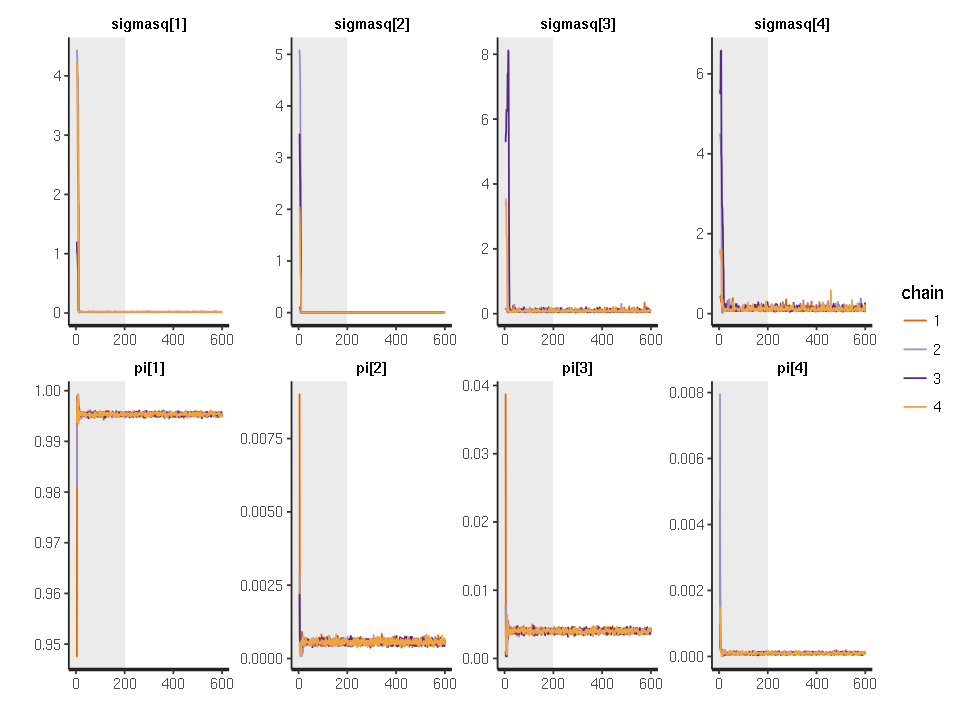

In [5]:
print(fit2, pars=c("Sigma", "sigmasq", "pi"), probs=c(0.025, 0.5, 0.975), digits_summary=5)
options(repr.plot.width=8, repr.plot.height=6)
traceplot(fit2, pars = c("sigmasq", "pi"), inc_warmup = TRUE, nrow = 2)


In [8]:
head(snp_table)
table(snp_table$category) # too few M2...
filter(snp_table, category==2) %>% head() # F-spec
filter(snp_table, category==3) %>% head() # M-spec
filter(snp_table, category==4) %>% head()

p1,p2,p3,p4,category,SNP
0.9962999,3.450511e-04,0.0033474824,7.519667e-06,1,rs115991721
0.9994862,4.975670e-05,0.0004639232,7.098154e-08,1,rs12562034
0.9995278,2.717059e-05,0.0004450126,3.711318e-08,1,rs4040617
0.9987671,1.103077e-04,0.0011221944,3.974828e-07,1,rs79373928
0.9955442,6.906157e-04,0.0037350942,3.006742e-05,1,rs59771807
0.9956485,1.010771e-04,0.0042487530,1.684983e-06,1,rs116452738



     1      2      3      4 
328382    100    469     24 

p1,p2,p3,p4,category,SNP
0.036019138,0.9374483,3.171325e-04,0.0262154100,2,rs10462021
0.357543474,0.6411851,1.913121e-04,0.0010800745,2,rs333193
0.006625798,0.9903401,6.153304e-06,0.0030279589,2,rs3737576
0.009697224,0.9858746,1.349592e-05,0.0044147053,2,rs7532171
0.002690551,0.9946941,2.077182e-06,0.0026132302,2,rs116740237
0.301852160,0.6970217,1.362636e-04,0.0009898414,2,rs2274230


p1,p2,p3,p4,category,SNP
3.101780e-03,7.924509e-08,0.9968132,8.494491e-05,3,rs3811461
6.481497e-11,6.849143e-15,0.9995094,4.905506e-04,3,rs34175245
3.617435e-11,2.684173e-15,0.9996454,3.546203e-04,3,rs145685168
1.782791e-01,5.429191e-06,0.8216298,8.571185e-05,3,rs79540541
4.764629e-01,7.567522e-04,0.5197481,3.032185e-03,3,rs11538306
4.760320e-01,1.078451e-04,0.5233240,5.361366e-04,3,rs56013973


p1,p2,p3,p4,category,SNP
1.604356e-05,3.977056e-05,8.501608e-02,0.9149281,4,Affx-36290529
8.272576e-55,1.879029e-48,8.511916e-08,0.9999999,4,rs780094
6.539718e-08,9.387145e-08,1.409381e-01,0.8590618,4,rs3755322
1.250488e-01,3.215835e-01,3.168817e-02,0.5216795,4,rs114466565
1.076202e-03,4.952535e-01,1.722586e-04,0.5034980,4,rs116325030
5.434698e-04,3.099766e-01,1.931066e-04,0.6892868,4,rs114469043


In [9]:
# add annotations, make pretty
load(sprintf("%s/dat_30850.RData", OUT_DIR))


In [21]:
list_snps <- annotateSNP(filter(snp_table, category==2))
dim(list_snps)
head(list_snps)

[1] 100   7

SNP,p1,p2,p3,p4,category,gene
Affx-89023063,0.11688983,0.6410444,7.083312e-04,0.241357418,2,TFR2
rs10402760,0.06065339,0.9357744,7.003015e-05,0.003502196,2,ICAM5
rs10462021,0.03601914,0.9374483,3.171325e-04,0.026215410,2,PER3
rs1078443,0.25012732,0.7484627,1.372029e-04,0.001272788,2,NA
rs10981228,0.13939835,0.8588997,8.285613e-05,0.001619062,2,SUSD1
rs11090865,0.01415425,0.9842696,7.135957e-06,0.001569049,2,TRMU


In [13]:
source("../mixture_model_scripts/model_utils.R")
source("../mixture_model_scripts/snp_utils.R")    

list.prefixes <- c("zerosex", "onesex")
chrs <- c(1:22)
trait <- "30850"
list.ds <- lapply(list.prefixes, function(prefix) {
        all.dat <- do.call(rbind, lapply(chrs, function(chr) { getFile(prefix, chr, trait)}));
        colnames(all.dat)[1:3] <- c("CHR", "BP", "SNP");
        return(all.dat)
    })
    
list.ds2 <- extractOverlappingRows(list.ds)

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: mnormt
Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



[1] 2
[1] 329346     11


In [57]:
    filt.f <- list.ds2[[1]]
    filt.m <- list.ds2[[2]]
    snp.df <- snp_table

    snp.tab <- sexSpecSNPtables( filt.f, filt.m, snp.df) 


[1] 469
[1] 100


In [70]:
    f.tab <- annotateSNP(snp.tab$'1')
    m.tab <- annotateSNP(snp.tab$'2')
head(f.tab[order(f.tab$p_f),], 15)
head(m.tab[order(m.tab$p_m),], 20)


,SNP,CHR,BP,B_f,B_m,SE_f,SE_m,p_m,p_f,post,gene
23,rs11761528,7,99118801,-0.1344800,0.02262820,0.00723452,0.00649296,0.000492221,5.05611e-77,0.5209175,ZKSCAN5
44,rs17277546,7,99489571,-0.1467380,0.01460930,0.00965627,0.00861096,0.089776300,4.18337e-52,0.9873277,TRIM4
21,rs117327231,18,71916636,0.1522690,-0.01408320,0.01304950,0.01231450,0.252782000,1.91657e-31,0.9913949,NA
8,rs111643567,7,98861216,-0.2432950,0.04239360,0.02407390,0.02104410,0.043958000,5.29927e-24,0.8865622,MYH16
32,rs13222543,7,100015457,-0.1461080,0.02225320,0.01480520,0.01321070,0.092091200,5.80097e-23,0.9812047,ZCWPW1
24,rs11769461,7,98877267,-0.1397540,0.01775220,0.01433810,0.01279890,0.165442000,1.93505e-22,0.9888351,MYH16
99,rs9928591,16,81570478,0.0806705,-0.00664100,0.00840071,0.00790531,0.400872000,7.91571e-22,0.9971817,CMIP
25,rs117722415,7,100167156,-0.1115280,0.00188112,0.01162900,0.01060780,0.859246000,8.91806e-22,0.9969102,NA
46,rs17713514,11,62803102,0.0716225,0.00733376,0.00791989,0.00735974,0.319023000,1.54033e-19,0.9970653,NA
89,rs7780066,7,137801915,0.0424387,0.00677290,0.00493908,0.00454266,0.135975000,8.61094e-18,0.9968968,AKR1D1


,SNP,CHR,BP,B_f,B_m,SE_f,SE_m,p_m,p_f,post,gene
258,rs3803800,17,7462969,0.00232205,0.1226700,0.00489009,0.00449480,1.36753e-163,0.634896000,0.9993080,TNFSF12-TNFSF13
307,rs55784804,17,7536460,-0.01901790,-0.1519790,0.00667153,0.00611889,6.71962e-136,0.004364310,0.8598474,SHBG
249,rs35386490,17,7310006,0.01002880,0.0937844,0.00467479,0.00432617,4.77920e-104,0.031931700,0.9977145,NLGN2
40,rs113017476,2,31989359,0.00916739,0.1835690,0.01022550,0.00939501,6.56268e-85,0.369976000,0.9713512,NA
303,rs55662831,17,7630193,0.00770704,0.0702990,0.00411978,0.00381379,8.72517e-76,0.061383700,0.9993513,DNAH2
330,rs62062590,17,7617378,0.00729775,0.0727150,0.00432587,0.00398788,3.34925e-74,0.091605100,0.9994823,EFNB3
373,rs72796891,2,32447408,0.00111583,0.1568240,0.00940963,0.00866327,3.67977e-73,0.905605000,0.9952134,SLC30A6
370,rs72787520,2,32851882,0.00111193,0.1652190,0.01045460,0.00961248,3.79252e-66,0.915298000,0.9922358,BIRC6
461,rs8073498,17,7569698,0.01258260,0.0639796,0.00408883,0.00376749,1.28646e-64,0.002089240,0.9889210,TP53
162,rs1625895,17,7578115,0.01659870,0.0876656,0.00605403,0.00556619,7.67033e-56,0.006111830,0.9893855,TP53


In [66]:
write.table(f.tab, file=sprintf("%s/snp_30850_f.txt", OUT_DIR), row.names=FALSE, sep="\t")
write.table(m.tab, file=sprintf("%s/snp_30850_m.txt", OUT_DIR), row.names=FALSE, sep="\t")

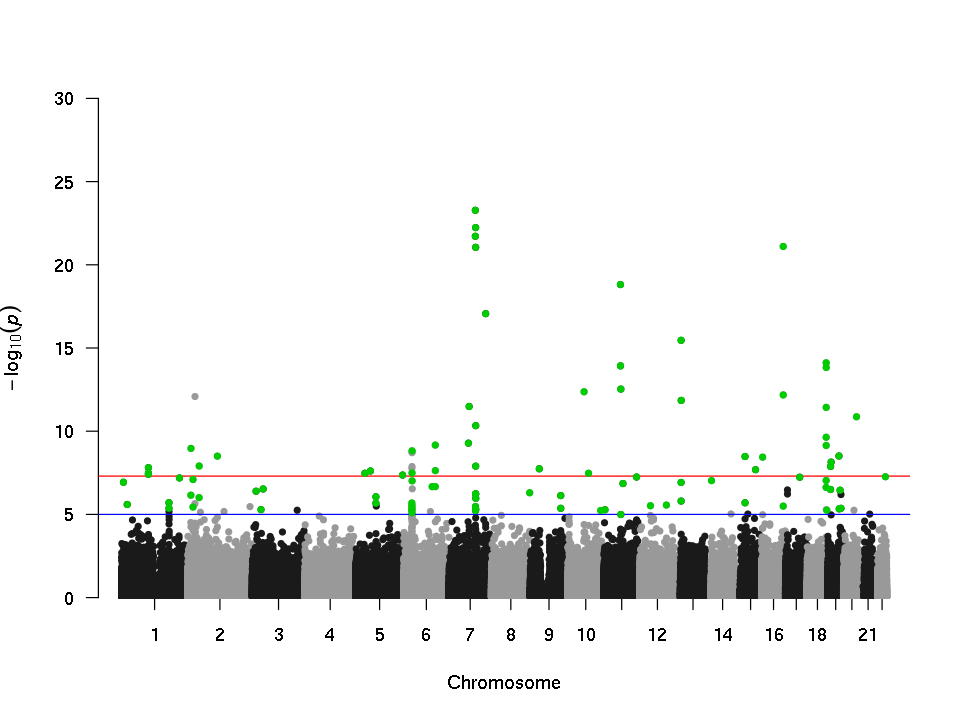

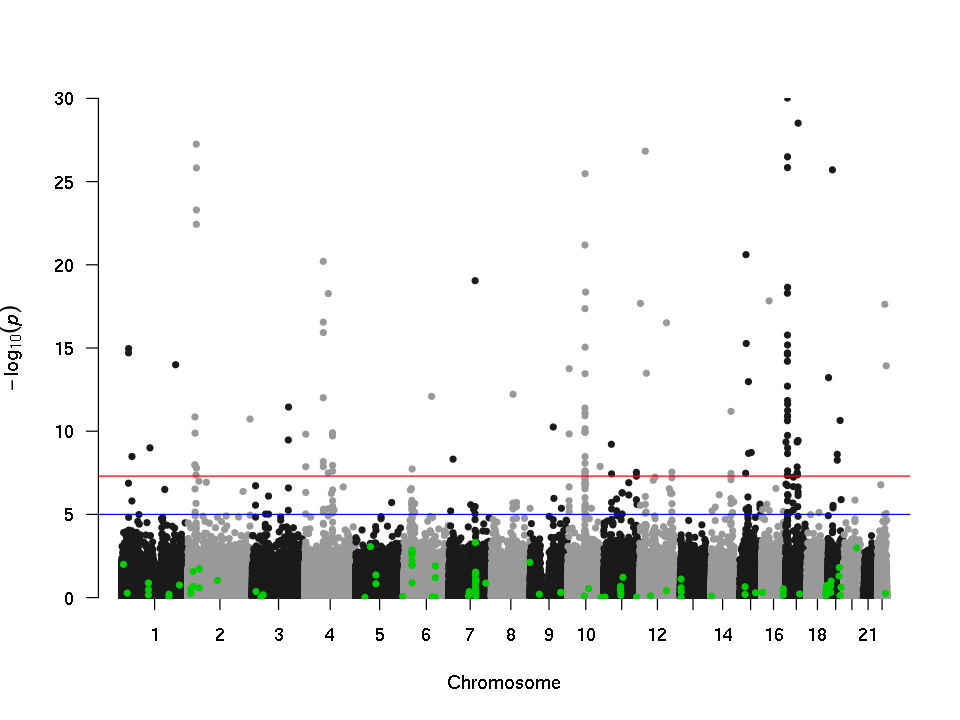

In [64]:
# VISUALIZE
my.chr <- c(1:22)
filt.f$CHR <- sapply(filt.f$CHR, as.numeric)
filt.m$CHR <- sapply(filt.m$CHR, as.numeric)

manhattan(filt.f[filt.f$CHR %in% my.chr,], highlight=f.tab$SNP, ylim=c(0, 30))
manhattan(filt.m[filt.m$CHR %in% my.chr,], highlight=f.tab$SNP, ylim=c(0,30))


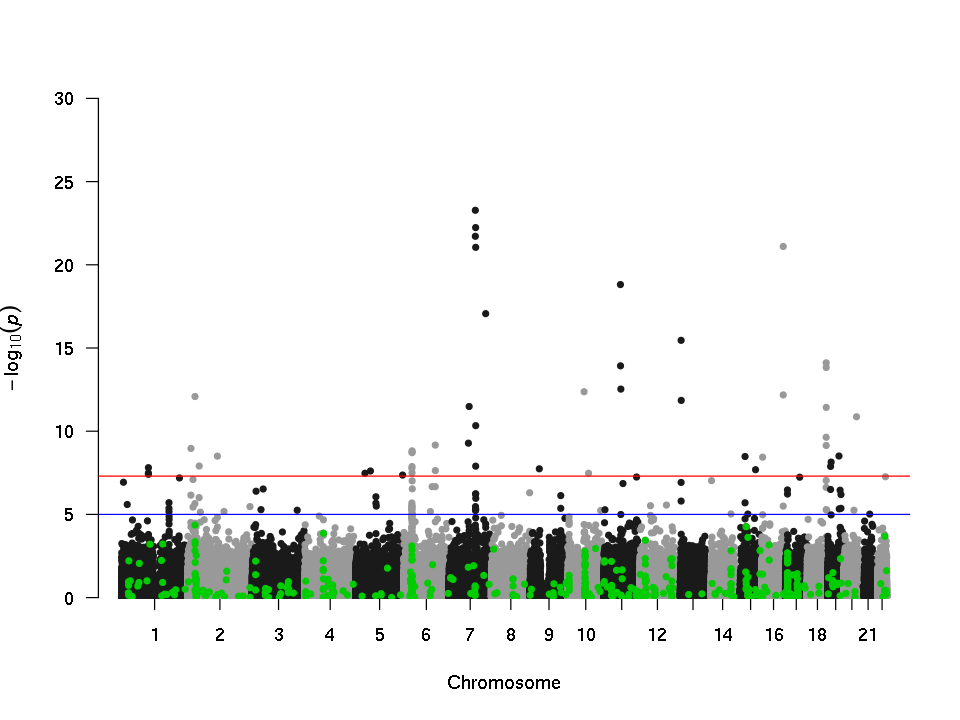

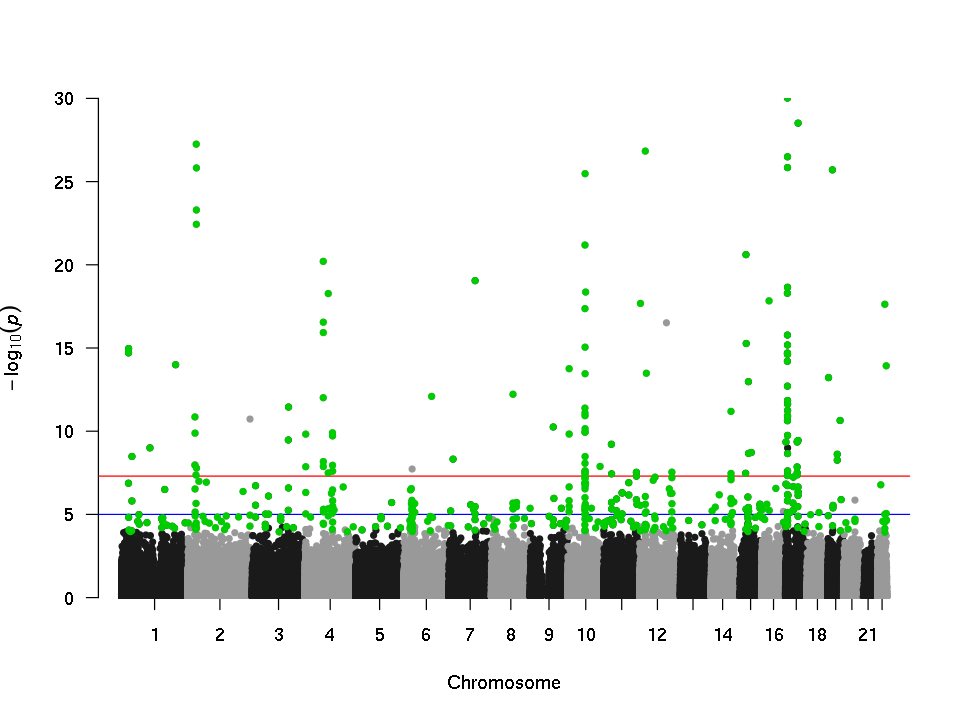

In [65]:
manhattan(filt.f[filt.f$CHR %in% my.chr,], highlight=m.tab$SNP, ylim=c(0, 30))
manhattan(filt.m[filt.m$CHR %in% my.chr,], highlight=m.tab$SNP, ylim=c(0,30))

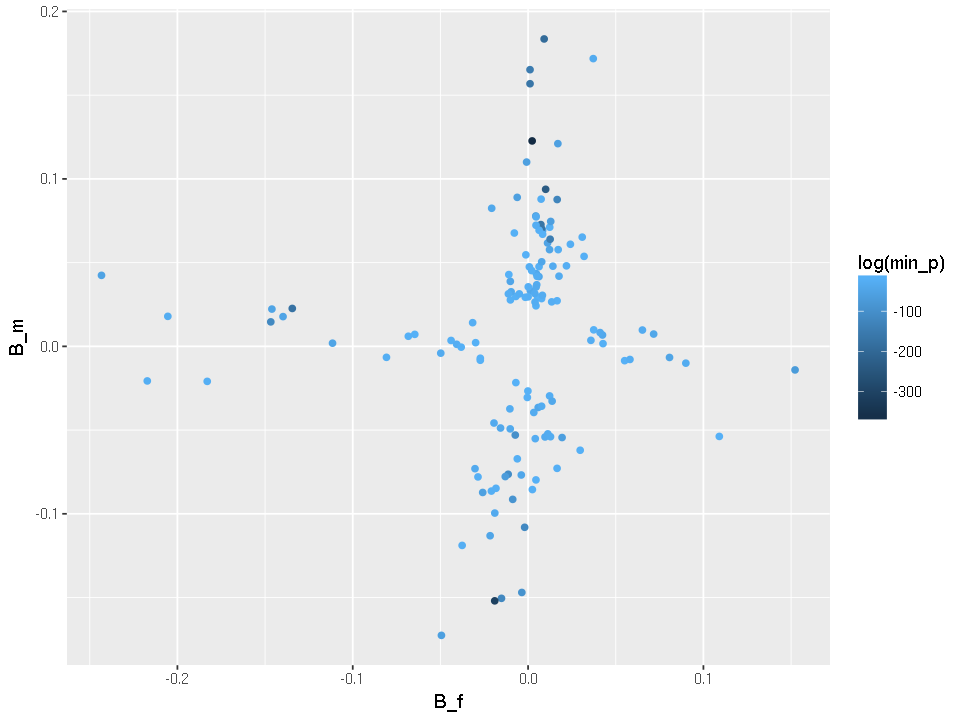

In [81]:
comb_tab <- rbind(f.tab, m.tab)
comb_tab$min_p <- apply(comb_tab[,c("p_f", "p_m")], 1, min)
comb_tab2 <- comb_tab %>% filter(min_p < 10**(-8))

ggplot(comb_tab2, aes(x=B_f, y=B_m, colour=log(min_p)))+geom_point()


In [ ]:
# look at fit1 for this 
# can we simultaneously estimate?